In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.7, rc={'lines.linewidth': 1.5})
%matplotlib inline
cmap=cm.get_cmap('YlGnBu')


def expression_genename(d, gene_name):
    if   d=='GSE75367':
        return D[d].loc[gene_name].values
    elif d=='GSE51827':
        return D[d].loc[D[d+'_info'][D[d+'_info']['symbol']==gene_name]['ID']].values[0]
    else:
        print 'GSE not found, please check expression_genename function'


def sum_expression(d, l_genes, cmap='YlGnBu'):
    return np.log2(np.sum((np.exp2([expression_genename(d, g) for g in l_genes])-1.0), axis=0)+1.0)

def plot_genes(d, axis, xmin=-0.5, ymin=-0.5, yc=None, clim=None, m='o', label=None, cbar=True, clabel=None):
    data = [sum_expression(d, l[axis[i]]) for i in range(len(axis))]
    if yc!=None:
        data = [sum_expression(d, l[axis[i]])[yc] for i in range(len(axis))]

    if len(axis)==2:
        plt.plot(data[0], data[1], m, ms=14, label=label)
    elif len(axis)==3:
        im = plt.scatter(data[0], data[1], c=data[2], cmap=cmap, s=200, marker=m)
        if cbar:
            cbar = plt.colorbar(im, orientation='vertical')#, ticks=np.arange(np.min(clim), np.max(clim)+0.1, 1.0))
            if clabel==None:
                cbar.set_label(axis[2])
            else:
                cbar.set_label(clabel)
    if clim!=None:
        plt.clim(clim)
        if cbar:
            cbar.set_ticks(np.arange(np.min(clim), np.max(clim)+0.1, 1.0))
    plt.xlim(xmin=xmin)
    plt.ylim(ymin=ymin)
    if label!=None:
        plt.xlabel(axis[0])
        plt.ylabel(axis[1])
    
    
    
def barplot_lists(d, title=None, yc=None, l_keys=None, ax=None, marker='o', ylabel='expression (log2 values)'):
    if ax==None:
        f = plt.subplots(1, 1, figsize=(17, 4), sharex=True)
        ax = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
    if l_keys==None:
        l_keys=l.keys()
    data=[sum_expression(d, l[k]) for k in l_keys]
    if yc!=None:
        data=[sum_expression(d, l[k])[yc] for k in l_keys]
        
    sns.boxplot(  data=data, palette='YlGnBu', ax=ax, saturation=0.9, width=0.65, fliersize=0)
    sns.stripplot(data=data, jitter=True, palette='YlGnBu', size=8, linewidth=0.9, edgecolor='w',
                  marker=marker, ax=ax, alpha=0.8)
    if ylabel!=None:
        ax.set_ylabel(ylabel)
    ax.set_xticklabels(l_keys)
    plt.ylim(-1,13)
    if title!=None:
        plt.title(title)

In [2]:
D = {}
y = {}

# -------------------------  GSE75367  --------------------------------------------------
D['GSE75367'] = pd.read_csv('GSE75367_readCounts.txt', index_col=0, header=0, sep='\t')
n_reads = np.sum(D['GSE75367'].values, axis=0)
D['GSE75367'] = np.log2( (D['GSE75367']*1.0e+6)/n_reads + 1.0)

y['GSE75367'] = []
for i in D['GSE75367'].columns:
    if (i.split('-')[1][:2]=='42') or (i.split('-')[1][:2]=='82'):
        y['GSE75367'] += [0]
    else:
        y['GSE75367'] += [1]
y['GSE75367'] = np.array(y['GSE75367'])
print 'GSE75367: \n  Number of cluster CTCs =', len(n_reads)
print '    number of ER+/HER2-  =', np.sum(y['GSE75367']==0)
print '    number of triple neg =', np.sum(y['GSE75367']==1), '\n'
# ---------------------------------------------------------------------------------------


# -------------------------  GSE51827  --------------------------------------------------
min_reads = 1.0e+6
D['GSE51827'] = pd.read_excel('GSE51827_readCounts.xls', index_col=0, header=0, sep='\t')
D['GSE51827_info'] = pd.read_excel('GSE51827_platform.xls', index_col=None, header=0, sep='\t')
D['GSE51827'] = D['GSE51827'][D['GSE51827'].columns[np.sum(D['GSE51827'].values, axis=0) >= min_reads]]
n_reads = np.sum(D['GSE51827'].values, axis=0)
D['GSE51827'] = np.log2( (D['GSE51827']*1.0e+6)/n_reads + 1.0)

# y=0 represents CL (cluster of CTC) while y=1 represents SC (single CTC)
y['GSE51827'] = []
for i in D['GSE51827'].columns:
    if i.split('_')[1][:2] == 'CL':
        y['GSE51827'] += [0]
    elif i.split('_')[1][:2] == 'SC':
        y['GSE51827'] += [1]
y['GSE51827'] = np.array(y['GSE51827'])

print 'GSE51827: '
print '  Number of cluster CTCs =', np.sum(y['GSE51827']==0)
print '  Number of single  CTCs =', np.sum(y['GSE51827']==1)
# ---------------------------------------------------------------------------------------

GSE75367: 
  Number of cluster CTCs = 74
    number of ER+/HER2-  = 25
    number of triple neg = 49 

GSE51827: 
  Number of cluster CTCs = 11
  Number of single  CTCs = 13


In [3]:
l = {'JAG': ['JAG1', 'JAG2'],
     'DLL': ['DLL1', 'DLL3', 'DLL4'],
     'HES': ['HES1', 'HES5'],
     'Mes': ['ZEB1', 'ZEB2', 'SNAI1', 'SNAI2', 'TWIST1', 'VIM', 'CD44'],
     'Epi': ['CDH1', 'EPCAM', 'CD24'],
     'OVOL'  : ['GRHL2', 'OVOL2', 'OVOL1', 'CDH3'] ,
#     'OVOL'  : ['OVOL2', 'OVOL1'] 
    }

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:58: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:26: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


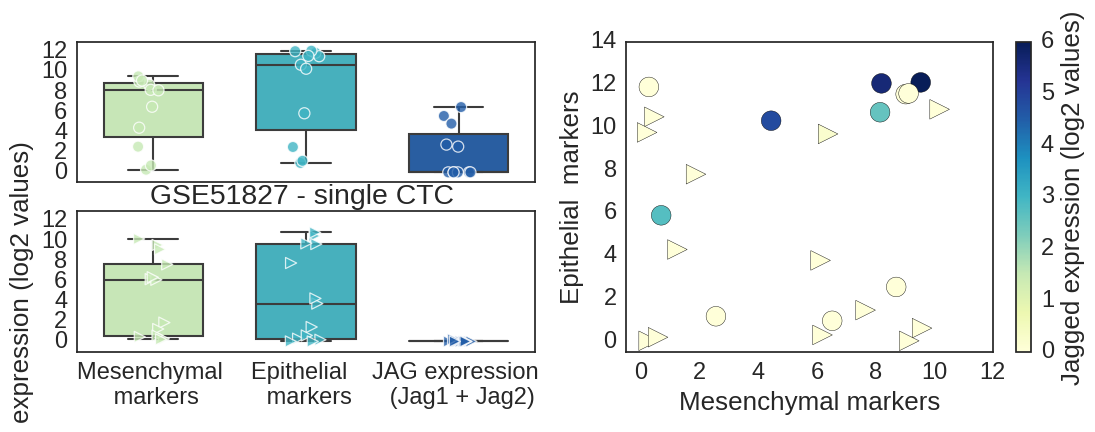

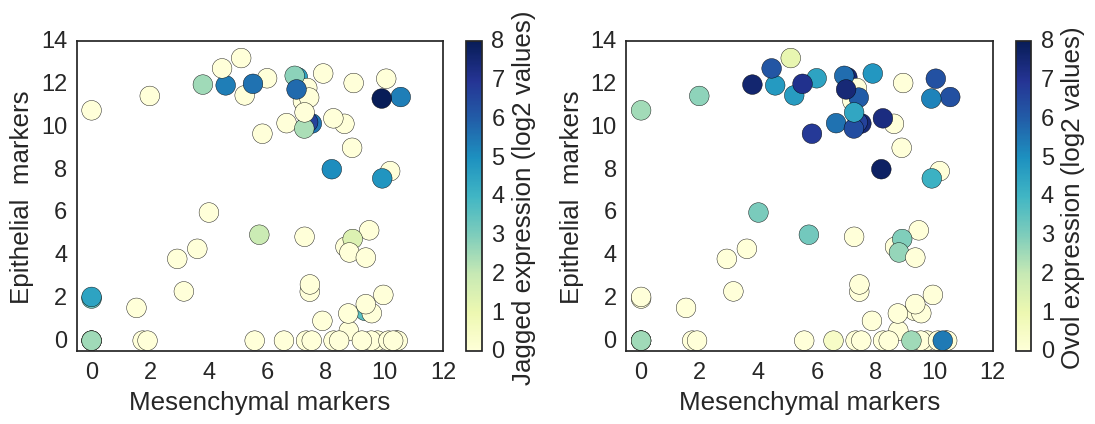

In [4]:
data_gse = 'GSE51827'
f = plt.subplots(2, 2, figsize=(13, 4), sharex=True)
ax = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
barplot_lists(data_gse, title=None, yc=(y[data_gse]==0), ax=ax, l_keys=['Mes', 'Epi', 'JAG'], ylabel=None)
ax.set_xticklabels([])#'Mesenchymal \n markers', 'Epithelial  \n markers', 'JAG expression \n (Jag1 + Jag2)'])
ax = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
barplot_lists(data_gse, title=data_gse+' - single CTC ', yc=(y[data_gse]==1), ax=ax, l_keys=['Mes', 'Epi', 'JAG'],
              marker='>')
ax.set_xticklabels(['Mesenchymal \n markers', 'Epithelial  \n markers', 'JAG expression \n (Jag1 + Jag2)'])


ax = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=2)
plot_genes(data_gse, ['Mes', 'Epi', 'JAG'], yc=(y[data_gse]==0), m='o', label='cluster CTC', clim=[0,6], 
           clabel='Jagged expression (log2 values)')
plot_genes(data_gse, ['Mes', 'Epi', 'JAG'], yc=(y[data_gse]==1), m='>', label='single  CTC', clim=[0,6], cbar=False)
plt.xlabel('Mesenchymal markers')
plt.ylabel('Epithelial  markers')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13),
          ncol=2, fancybox=True, shadow=True)
plt.savefig(data_gse+'.pdf', format='pdf')



data_gse = 'GSE75367'
f = plt.subplots(1, 2, figsize=(13, 4), sharex=True)
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
plt.xlabel('Mesenchymal markers')
plt.ylabel('Epithelial  markers')
plot_genes(data_gse, ['Mes', 'Epi', 'JAG'], clim=[0, 8], clabel='Jagged expression (log2 values)')
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
plot_genes(data_gse, ['Mes', 'Epi', 'OVOL'], clim=[0, 8], clabel='Ovol expression (log2 values)')
plt.xlabel('Mesenchymal markers')
plt.ylabel('Epithelial  markers')
plt.savefig(data_gse+'.pdf', format='pdf')